In [1]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_excel(open('metrics.xlsx', 'rb'), sheet_name='prs') 
# df.head()

## normalize external contributions

In [4]:
df['Squad'] = df['Squad'].fillna('external')
df['Team'] = df['Team'].fillna('external')
# df.head()

## Convert durations to hours

In [5]:
df['UntilMerged'] = df['UntilMerged'].div(24)
df['UntilMerged'] = df['UntilMerged'].round(decimals=2)
# df.head()

## get the summary of cycle time

In [6]:
df[['Additions', 'deletions', 'Comments', 'UntilMerged']].describe()

,Additions,deletions,Comments,UntilMerged
count,522.000000,522.000000,522.000000,522.000000
mean,391.065134,162.768199,0.988506,7.312126
std,1541.070610,735.974825,2.900106,15.294889
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.120000
50%,24.000000,6.000000,0.000000,1.040000
75%,207.500000,32.000000,1.000000,6.397500
max,21891.000000,12085.000000,33.000000,78.880000


## see the distribution of times 

<Axes: xlabel='UntilMerged', ylabel='Comments'>

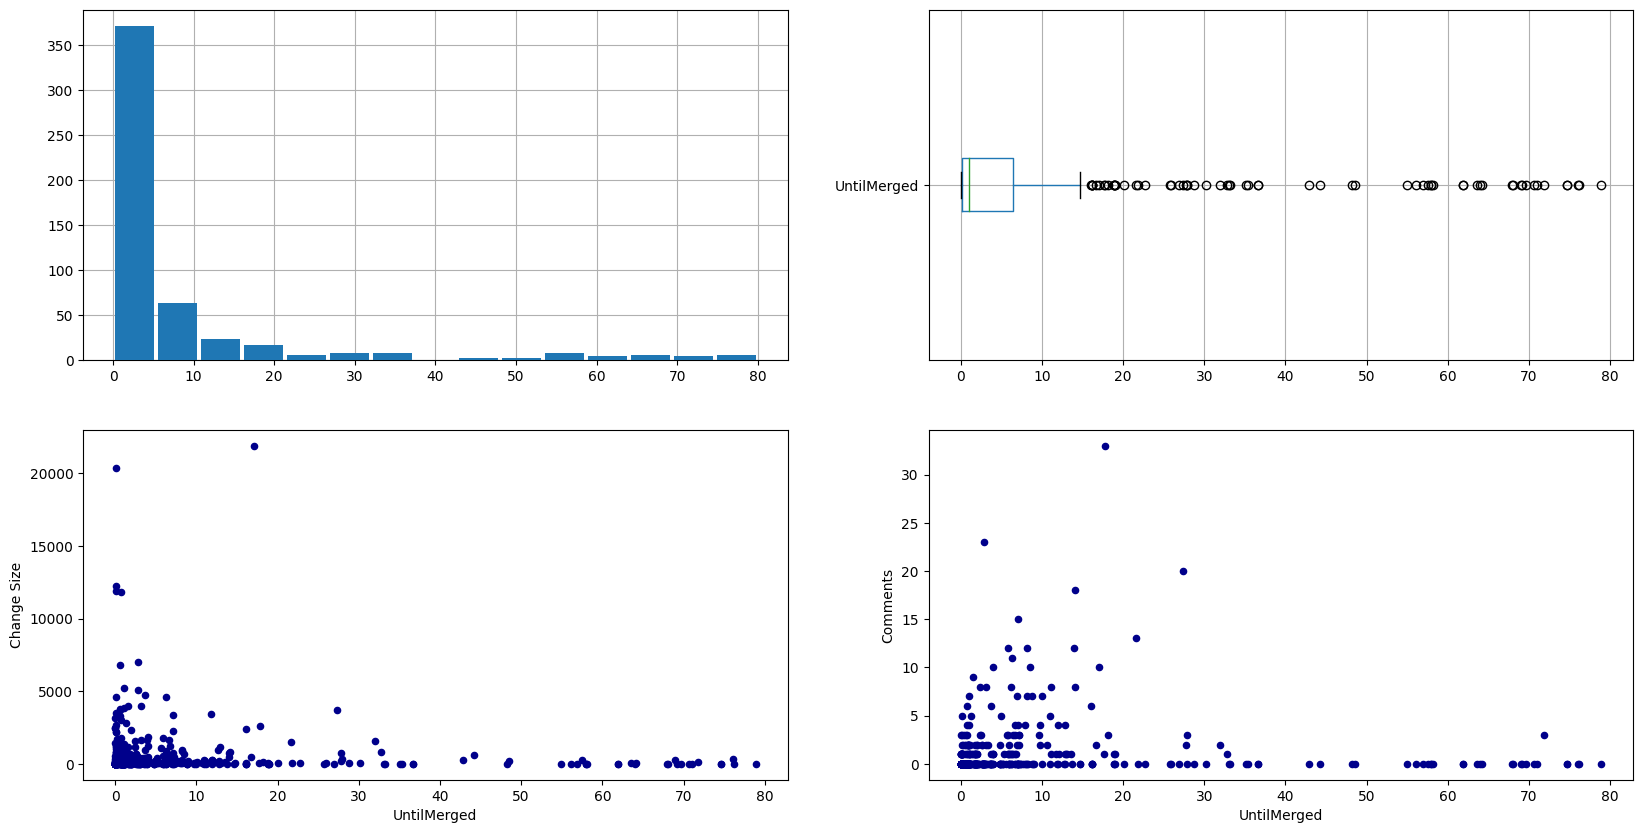

In [7]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))
df['UntilMerged'].hist(bins=15, zorder=4, rwidth=0.9, range=[0, 80], ax=axs[0,0])
df.boxplot(column=[ 'UntilMerged'], vert=False, ax=axs[0,1])
df.plot.scatter(x='UntilMerged', y='Change Size',  c='DarkBlue', ax=axs[1,0])
df.plot.scatter(x='UntilMerged', y='Comments',  c='DarkBlue', ax=axs[1,1])

## some conclusions based on the top graph
* most PRs is getting merged within 5 days
* we have quite huge outlier interms of PR Cycle time
* change size had almost no effect on cycle time
* comments have almost no effects on cycle time

<Axes: >

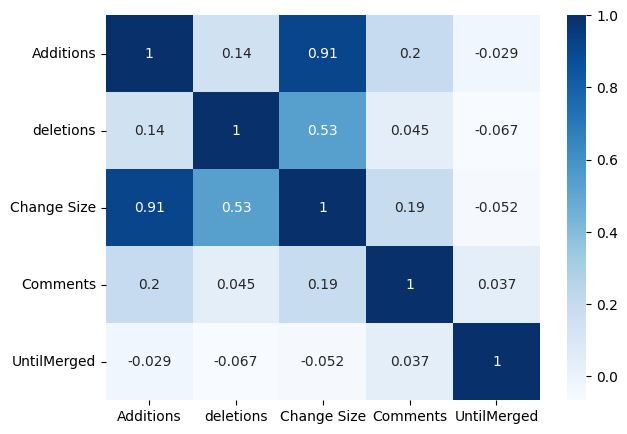

In [8]:
corr = df[['Additions', 'deletions', 'Change Size', 'Comments', 'UntilMerged' ]].corr()
fig, ax = plt.subplots(figsize=[7,5])
sb.heatmap(corr, cmap="Blues", annot=True, ax=ax)

## some conclusions from the correlation matrix
* additions have more comments vs deletions
* we are mostely adding code rather than deleting code
* additions and deletions almost have no influence on cycle time

## Some VS Team insights

In [9]:
vs = df[df['Squad'] == 'vs']
# vs.head()

## get the summary of cycle time

In [10]:
vs[['Additions', 'deletions', 'Comments', 'UntilMerged']].describe()

,Additions,deletions,Comments,UntilMerged
count,192.000000,192.000000,192.000000,192.000000
mean,746.671875,313.072917,1.057292,4.002969
std,2413.817955,1054.285344,2.221232,10.967814
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,2.000000,0.000000,0.170000
50%,124.000000,10.000000,0.000000,0.810000
75%,540.250000,96.500000,1.000000,2.760000
max,21891.000000,12085.000000,11.000000,76.040000


## see the distribution of times 

<Axes: xlabel='UntilMerged', ylabel='Comments'>

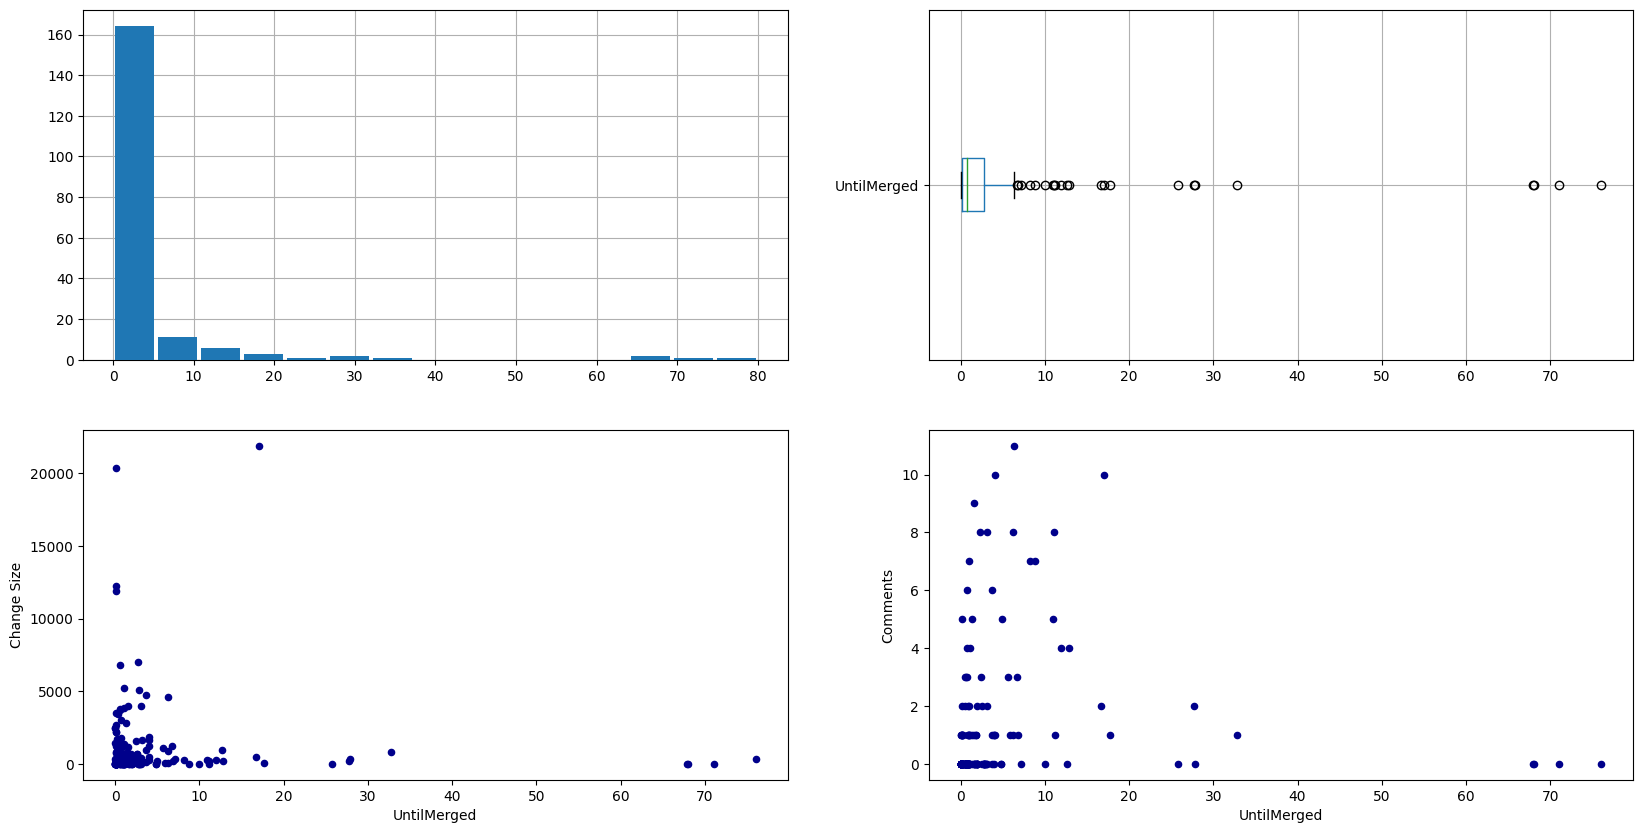

In [11]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))
vs['UntilMerged'].hist(bins=15, zorder=4, rwidth=0.9, range=[0, 80], ax=axs[0,0])
vs.boxplot(column=[ 'UntilMerged'], vert=False, ax=axs[0,1])
vs.plot.scatter(x='UntilMerged', y='Change Size',  c='DarkBlue', ax=axs[1,0])
vs.plot.scatter(x='UntilMerged', y='Comments',  c='DarkBlue', ax=axs[1,1])

## some conclusions based on the top graph
* most PRs is getting merged within 5 days
* we have quite huge outlier interms of PR Cycle time
* change size had almost no effect on cycle time
* comments have almost no effects on cycle time

<Axes: >

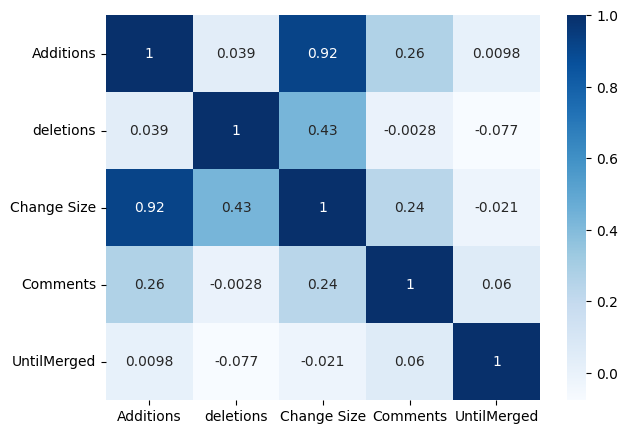

In [12]:
corr = vs[['Additions', 'deletions', 'Change Size', 'Comments', 'UntilMerged' ]].corr()
fig, ax = plt.subplots(figsize=[7,5])
sb.heatmap(corr, cmap="Blues", annot=True, ax=ax)

## team segmantation

In [32]:
vs[vs['Team'] == 'backend'].describe().T

,count,mean,std,min,25%,50%,75%,max
Additions,120.0,730.616667,1401.383153,0.0,26.50,234.00,791.75,11879.00
deletions,120.0,468.375000,1295.511859,0.0,3.00,16.00,323.00,12085.00
Change Size,120.0,1198.991667,1959.140853,0.0,77.25,429.00,1393.25,12207.00
Comments,120.0,1.016667,2.122244,0.0,0.00,0.00,1.00,10.00
UntilMerged,120.0,2.744000,10.075290,0.0,0.17,0.62,1.62,76.04


In [33]:
vs[vs['Team'] == 'frontend'].describe().T

,count,mean,std,min,25%,50%,75%,max
Additions,72.0,773.430556,3518.724940,0.0,6.7500,17.00,188.75,21891.00
deletions,72.0,54.236111,261.579627,0.0,1.0000,4.00,29.00,2206.00
Change Size,72.0,827.666667,3560.816294,1.0,11.0000,21.00,270.00,21899.00
Comments,72.0,1.125000,2.390931,0.0,0.0000,0.00,1.00,11.00
UntilMerged,72.0,6.101250,12.096377,0.0,0.4475,1.81,6.74,68.04


## Some info
* Backend PRs takes less than frontend PRs interms of cycle time 2.7 days vs 6.1 day
* Frontend have more PR comments vs Backend 1.12 vs 1.01
* Backend have bigger PRs in general comparing to frontend 1198.9 vs 827.7 

<Axes: title={'center': 'contributions'}, xlabel='Team'>

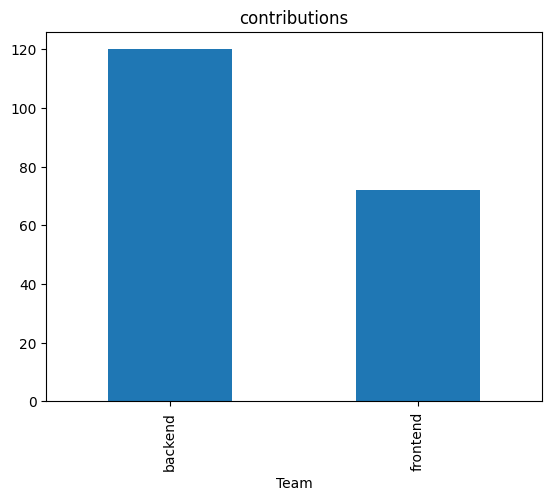

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1)
vs.groupby(['Team']).size().plot.bar( title = "contributions")

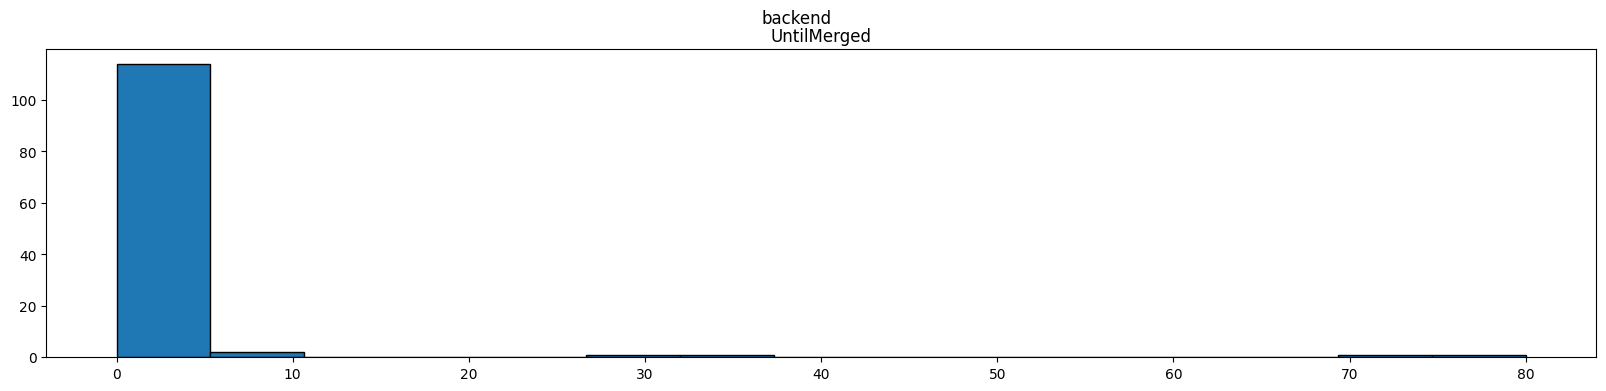

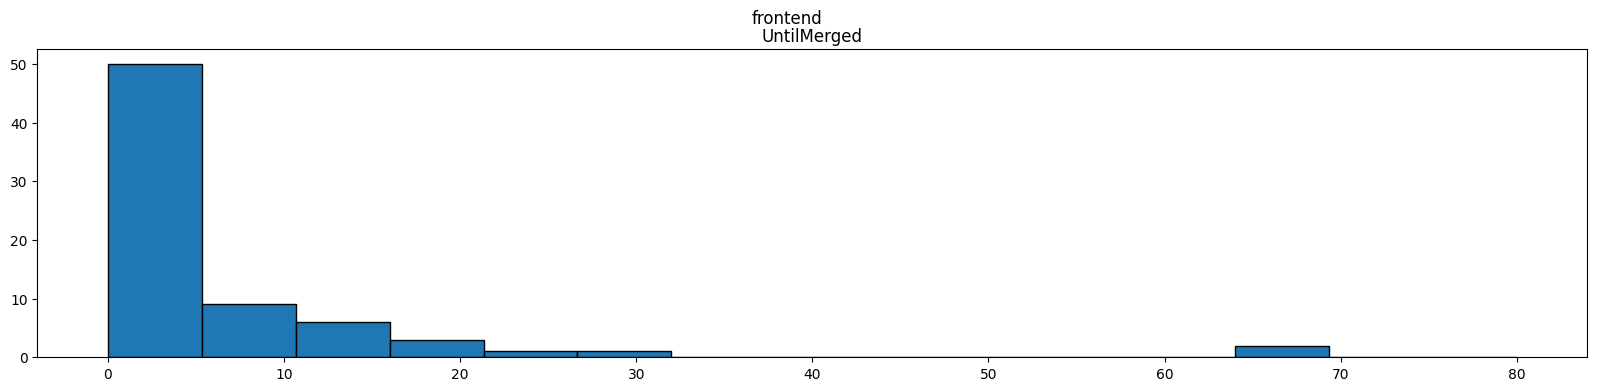

In [14]:
grouped = vs.groupby(['Team'])[['Additions', 'deletions', 'Change Size', 'Comments', 'UntilMerged']]
for team, data in grouped:
    axes = data[['UntilMerged']].hist(layout=(1, 1), figsize=(20, 4), ec='k', grid=False,  bins=15, range=[0, 80])

    # extract the figure object from the array of axes
    fig = axes[0][0].get_figure()

    # add the gender as the title
    fig.suptitle(team)

backend          Axes(0.1,0.15;0.363636x0.75)
frontend    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

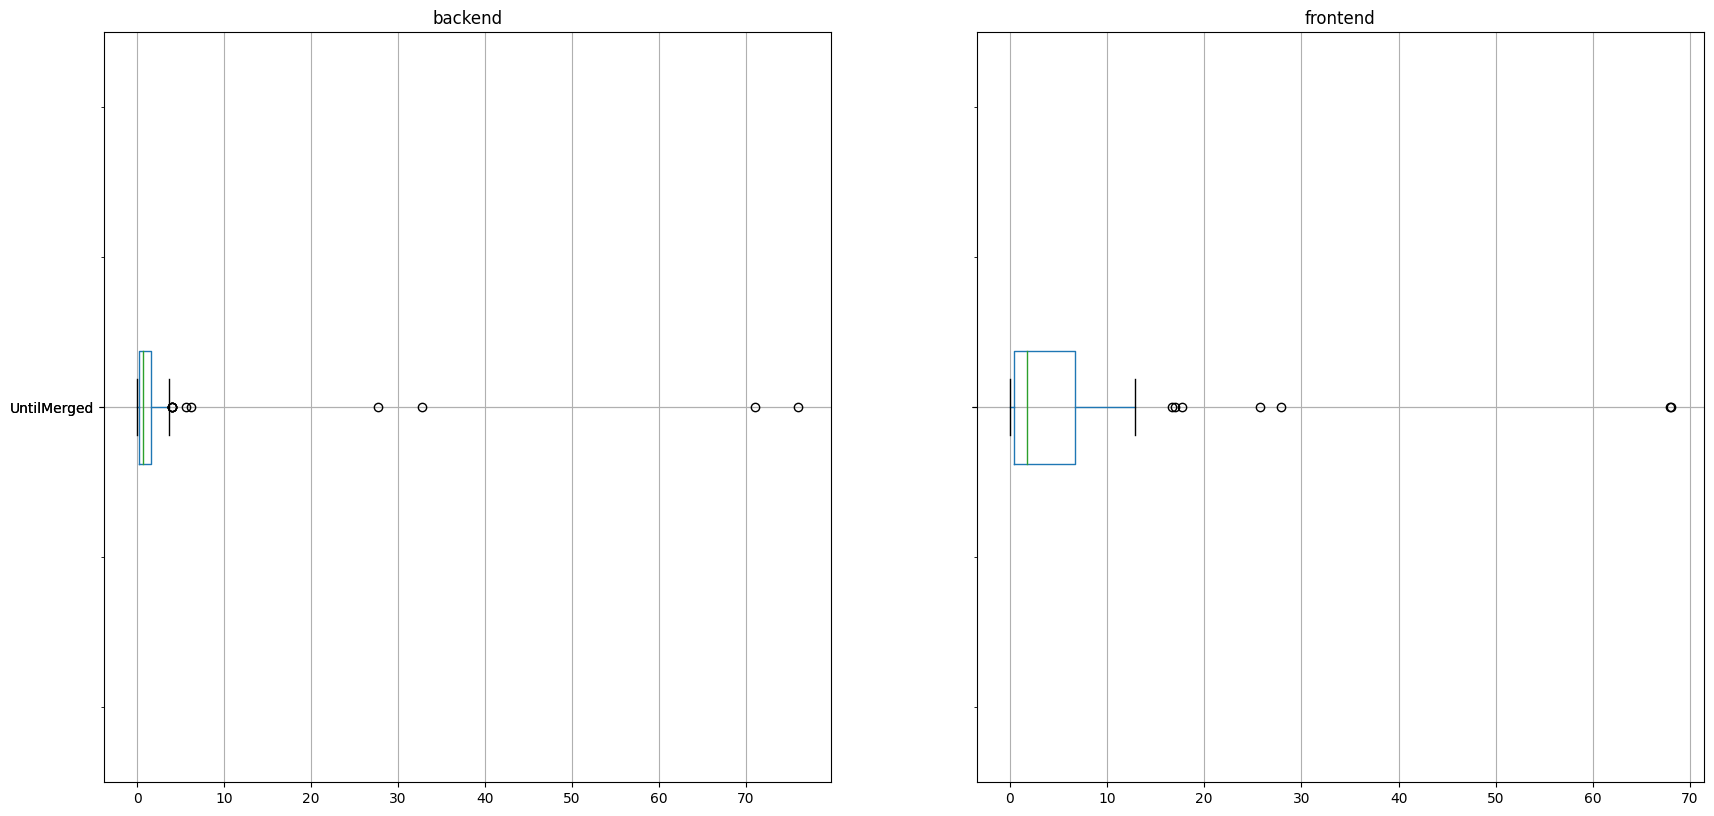

In [15]:

grouped.boxplot(vert=False, column=['UntilMerged'], figsize=(20, 10))

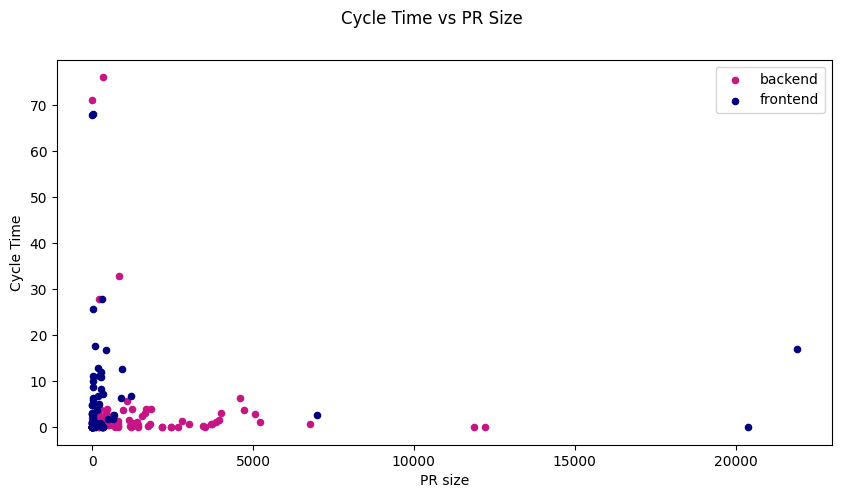

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = {'backend': 'MediumVioletRed', 'frontend': 'Navy'}
for kind, data in vs.groupby('Team'):
    data.plot(kind='scatter',  y='UntilMerged', x='Change Size', color=colors[kind], label=kind, ax=ax)

ax.set(ylabel='Cycle Time', xlabel='PR size')
fig.suptitle('Cycle Time vs PR Size')
plt.show()

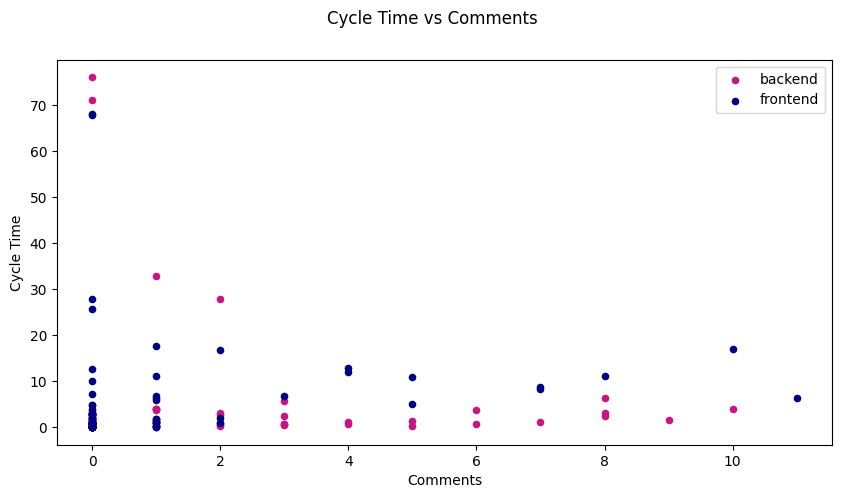

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
colors = {'backend': 'MediumVioletRed', 'frontend': 'Navy'}
for kind, data in vs.groupby('Team'):
    data.plot(kind='scatter',  y='UntilMerged', x='Comments', color=colors[kind], label=kind, ax=ax)

ax.set(ylabel='Cycle Time', xlabel='Comments')
fig.suptitle('Cycle Time vs Comments')
plt.show()    


## some conclusions 
* backend and frontend have similar behavior regarding comments have no affect on cycle time
* backend and frontend have similar behavior regarding pr size have no affect on cycle time